In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from math import pi
import qiskit_aer
from qiskit_aer import Aer
%matplotlib inline

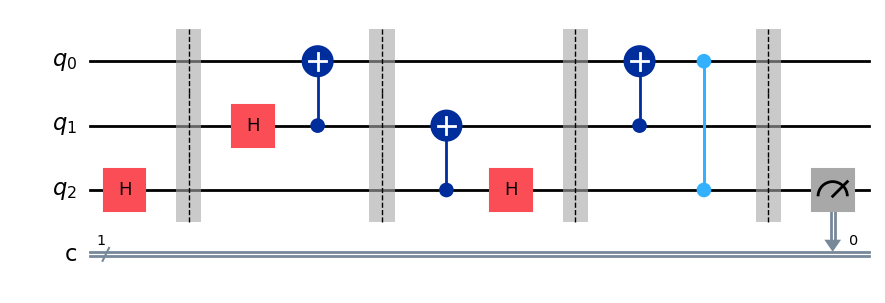

In [5]:

circuit = QuantumCircuit(3,1)

# initialize Olivia's qubit (quantum state to teleport)
circuit.h(2)
circuit.barrier()

# create Bell state pair
circuit.h(1)
circuit.cx(1, 0)
circuit.barrier()

# Olivia performs Bell state measurement
circuit.cx(2, 1)
circuit.h(2)
circuit.barrier()

# apply conditional operations on Barron's qubit
circuit.cx(1, 0)
circuit.cz(2, 0)
circuit.barrier()

# measure Barron's destination qubit
circuit.measure(2, 0)

circuit.draw(output='mpl');

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [7]:
service = QiskitRuntimeService(channel='ibm_quantum', token='')

In [8]:
qcomp = service.least_busy(operational=True, simulator=False)

In [9]:
pm = generate_preset_pass_manager(backend=qcomp, optimization_level=1) # optimize the circuit for quantum execution
isa_circuit = pm.run(circuit) # modify circuit for qcomp's specific Instruction Set Architecture (ISA)
sampler = Sampler(qcomp)
job = sampler.run([isa_circuit])

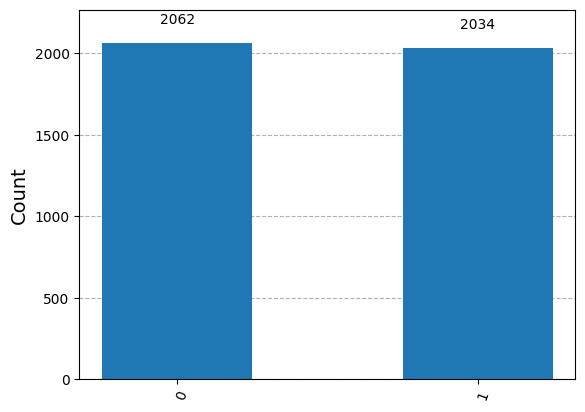

In [13]:
result = job.result()
plot_histogram(result[0].data.c.get_counts());